In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [8]:
orders = pd.read_excel("C:\\Users\\mca\\Downloads\\230968068\\Northwind.xlsx", sheet_name='Orders')
order_details = pd.read_excel("C:\\Users\\mca\\Downloads\\230968068\\Northwind.xlsx", sheet_name='Order Details')
products = pd.read_excel("C:\\Users\\mca\\Downloads\\230968068\\Northwind.xlsx", sheet_name='Products')
employees = pd.read_excel("C:\\Users\\mca\\Downloads\\230968068\\Northwind.xlsx", sheet_name='Employees')
customers = pd.read_excel("C:\\Users\\mca\\Downloads\\230968068\\Northwind.xlsx", sheet_name='Customers')
categories=pd.read_excel("C:\\Users\\mca\\Downloads\\230968068\\Northwind.xlsx", sheet_name="Categories")

In [11]:
merged_data = (
    orders
    .merge(order_details, on='OrderID')
    .merge(products, on='ProductID')
    .merge(employees, on='EmployeeID')
    .merge(customers, on='CustomerID')
    .merge(categories, on='CategoryID') 
)

In [12]:
product_sales = merged_data.groupby('ProductName')['Quantity'].sum().reset_index()

# Top 5 selling products
top_5 = product_sales.nlargest(5, 'Quantity')

# Bottom 5 selling products
bottom_5 = product_sales.nsmallest(5, 'Quantity')

print("Top 5 Selling Products:")
print(top_5)

print("\nBottom 5 Selling Products:")
print(bottom_5)

Top 5 Selling Products:
               ProductName  Quantity
3        Camembert Pierrot      1577
51    Raclette Courdavault      1496
18       Gorgonzola Telino      1397
17  Gnocchi di nonna Alice      1263
46                 Pavlova      1158

Bottom 5 Selling Products:
                  ProductName  Quantity
39            Mishi Kobe Niku        95
16               Genen Shouyu       122
20                 Gravad lax       125
10                  Chocolade       138
32  Laughing Lumberjack Lager       184


In [13]:
sales_by_employee = merged_data.groupby(['ProductName', 'FirstName', 'LastName'])['Quantity'].sum().reset_index()

# Get top 5 selling products and their salesmen
top_5_salesmen = sales_by_employee[sales_by_employee['ProductName'].isin(top_5['ProductName'])]

print("\nTop 5 Selling Products and Their Salesmen:")
print(top_5_salesmen)


Top 5 Selling Products and Their Salesmen:
                ProductName FirstName   LastName  Quantity
24        Camembert Pierrot    Andrew     Fuller       186
25        Camembert Pierrot      Anne  Dodsworth        44
26        Camembert Pierrot     Janet  Leverling       364
27        Camembert Pierrot     Laura   Callahan        96
28        Camembert Pierrot  Margaret    Peacock       331
29        Camembert Pierrot   Michael     Suyama        25
30        Camembert Pierrot     Nancy    Davolio       285
31        Camembert Pierrot    Robert       King        72
32        Camembert Pierrot    Steven   Buchanan       174
130  Gnocchi di nonna Alice    Andrew     Fuller       119
131  Gnocchi di nonna Alice     Janet  Leverling       390
132  Gnocchi di nonna Alice     Laura   Callahan        65
133  Gnocchi di nonna Alice  Margaret    Peacock       282
134  Gnocchi di nonna Alice   Michael     Suyama       178
135  Gnocchi di nonna Alice     Nancy    Davolio       136
136  Gnocchi

In [14]:
# Total sales of each product by ship country
sales_by_country = merged_data.groupby(['ProductName', 'ShipCountry'])['Quantity'].sum().reset_index()

print("\nTotal Sales of Each Product, Ship Country Wise:")
print(sales_by_country)


Total Sales of Each Product, Ship Country Wise:
       ProductName ShipCountry  Quantity
0     Alice Mutton     Austria       191
1     Alice Mutton     Belgium        40
2     Alice Mutton      Brazil        27
3     Alice Mutton      Canada       126
4     Alice Mutton      France        67
..             ...         ...       ...
931  Zaanse koeken       Italy         5
932  Zaanse koeken       Spain         5
933  Zaanse koeken      Sweden       121
934  Zaanse koeken          UK        25
935  Zaanse koeken         USA        66

[936 rows x 3 columns]


In [15]:
boston_sales = merged_data[merged_data['ProductName'] == 'Boston Crab Meat']
boston_customer_sales = boston_sales.groupby('CustomerID')['Quantity'].sum().reset_index()

print("\nTotal Sales of 'Boston Crab Meat', Customer Wise:")
print(boston_customer_sales)


Total Sales of 'Boston Crab Meat', Customer Wise:
   CustomerID  Quantity
0       ANTON        10
1       BERGS        75
2       BONAP        45
3       BOTTM        50
4       BSBEV        10
5       ERNSH        91
6       FAMIA         4
7       FRANK        50
8       FRANS         1
9       GODOS        40
10      HILAA        65
11      HUNGO        40
12      KOENE        60
13      LAZYK        10
14      LEHMS        35
15      LINOD        50
16      MAGAA         3
17      MAISD        10
18      OTTIK        20
19      PERIC        21
20      QUEEN        32
21      QUICK       170
22      RANCH        20
23      SAVEA        82
24      SUPRD         5
25      THECR        10
26      TRAIH         2
27      VAFFE        70
28      WANDK        10
29      WILMK        12


In [20]:
region_sales = merged_data.groupby(['Region_y', 'CategoryName', 'ProductName'])['Quantity'].sum().reset_index()

print("\nCustomer’s Region Wise Sales of Products in Each Category:")
print(region_sales)



Customer’s Region Wise Sales of Products in Each Category:
    Region_y CategoryName                       ProductName  Quantity
0         AK    Beverages                  Chartreuse verte        30
1         AK    Beverages                       Ipoh Coffee        24
2         AK    Beverages                      Lakkalikööri        50
3         AK   Condiments                      Gula Malacca        12
4         AK   Condiments  Louisiana Fiery Hot Pepper Sauce        15
..       ...          ...                               ...       ...
527       WY      Produce             Manjimup Dried Apples         6
528       WY      Produce   Uncle Bob's Organic Dried Pears        10
529       WY      Seafood                  Carnarvon Tigers        21
530       WY      Seafood                       Inlagd Sill        20
531       WY      Seafood             Nord-Ost Matjeshering         8

[532 rows x 4 columns]


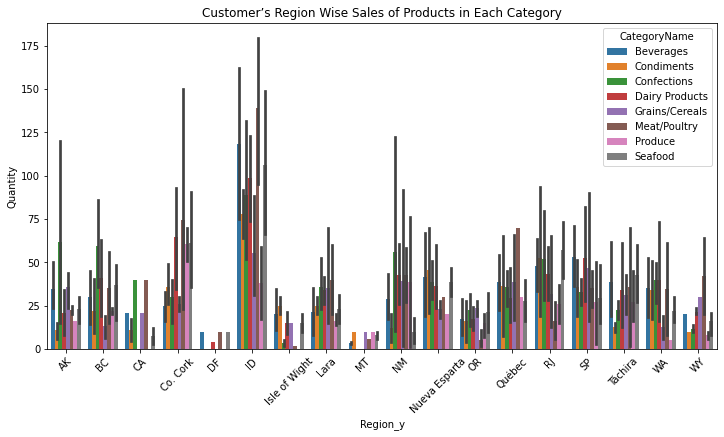

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=region_sales, x='Region_y', y='Quantity', hue='CategoryName')
plt.title("Customer’s Region Wise Sales of Products in Each Category")
plt.xticks(rotation=45)
plt.show()

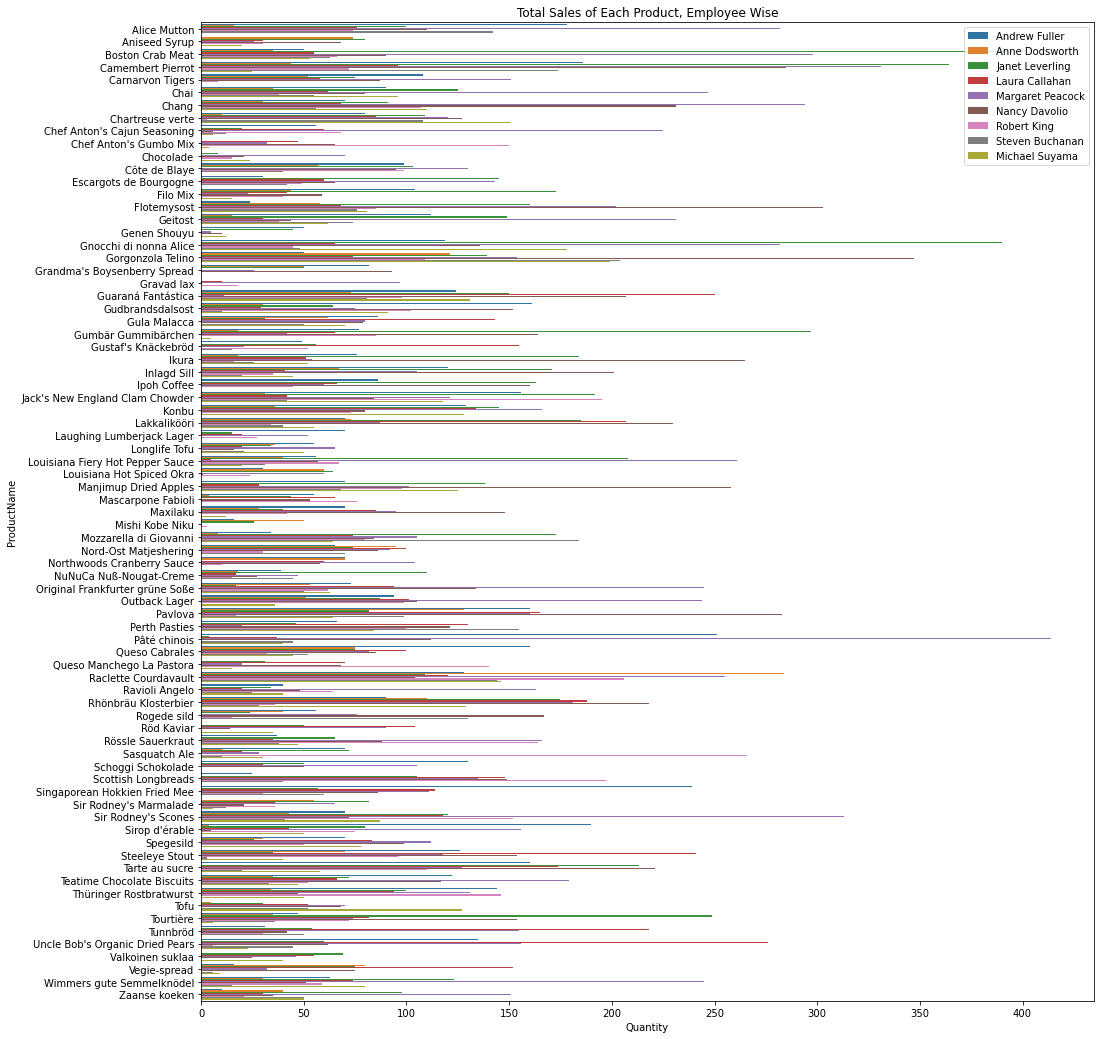

In [32]:
plt.figure(figsize=(16, 18))
sales_by_employee['FullName'] = sales_by_employee['FirstName'] + ' ' + sales_by_employee['LastName']
sns.barplot(data=sales_by_employee, y='ProductName', x='Quantity', hue='FullName')
plt.title("Total Sales of Each Product, Employee Wise")
plt.legend(loc='upper right')
plt.show()


In [33]:
total_sales = merged_data['Quantity'].sum()
category_sales = merged_data.groupby('CategoryName')['Quantity'].sum().reset_index()
category_sales['Percentage'] = (category_sales['Quantity'] / total_sales) * 100

print("\nTotal Sales of Each Product, Category-Wise as a Percentage of Entire Sales:")
print(category_sales)


Total Sales of Each Product, Category-Wise as a Percentage of Entire Sales:
     CategoryName  Quantity  Percentage
0       Beverages      9532   18.574741
1      Condiments      5298   10.324064
2     Confections      7906   15.406201
3  Dairy Products      9149   17.828400
4  Grains/Cereals      4562    8.889842
5    Meat/Poultry      4199    8.182474
6         Produce      2990    5.826529
7         Seafood      7681   14.967749


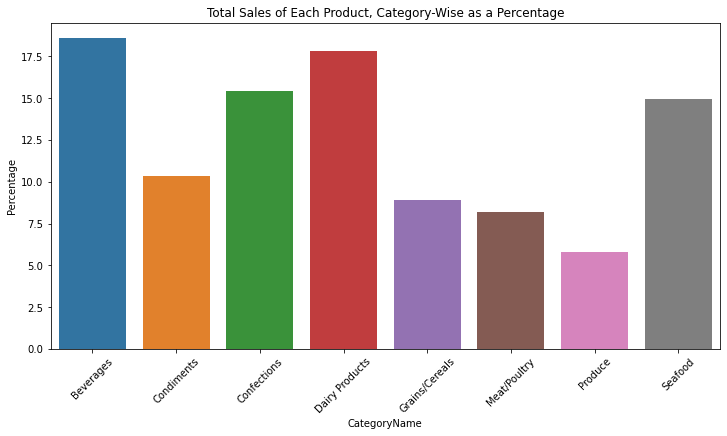

In [34]:
plt.figure(figsize=(12, 6))
sns.barplot(data=category_sales, x='CategoryName', y='Percentage')
plt.title("Total Sales of Each Product, Category-Wise as a Percentage")
plt.xticks(rotation=45)
plt.show()

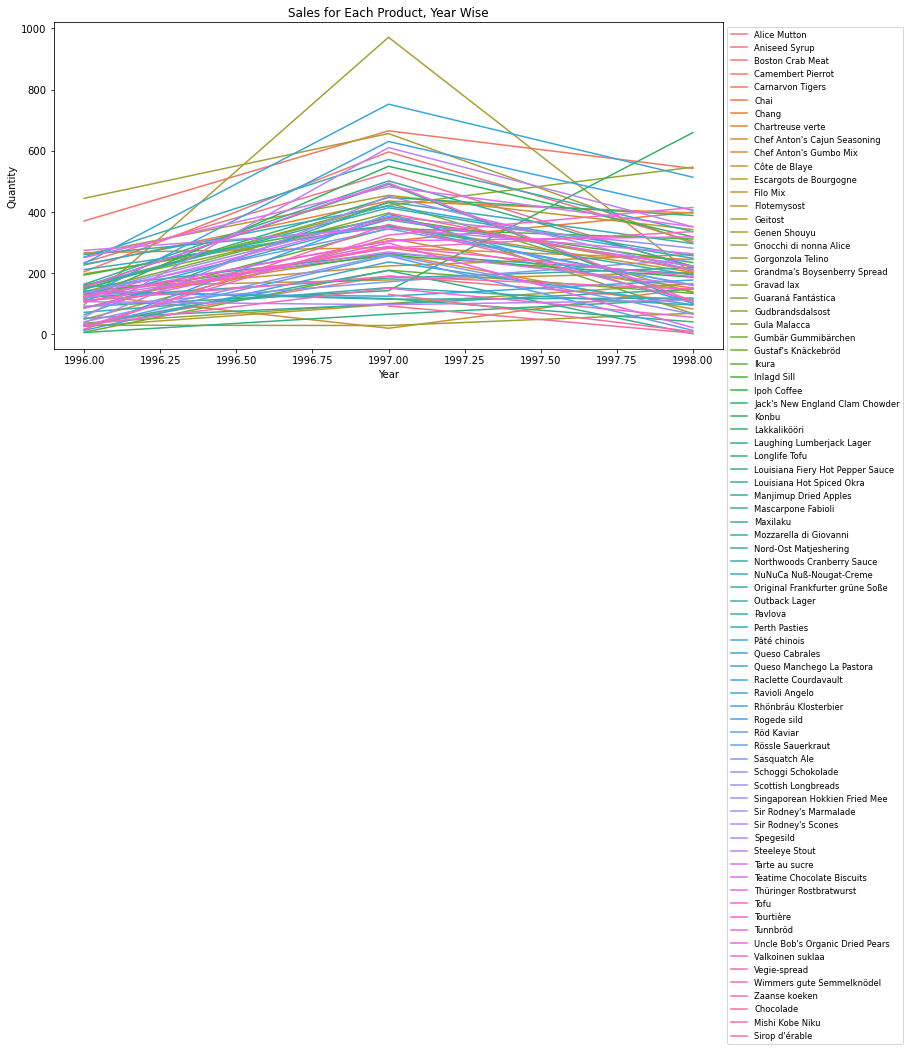

In [36]:
merged_data['OrderDate'] = pd.to_datetime(merged_data['OrderDate'])
merged_data['Year'] = merged_data['OrderDate'].dt.year

# Sales per product per year
yearly_sales = merged_data.groupby(['Year', 'ProductName'])['Quantity'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_sales, x='Year', y='Quantity', hue='ProductName')
plt.title("Sales for Each Product, Year Wise")
plt.legend(fontsize='small', loc='upper left', bbox_to_anchor=(1, 1)) 
plt.show()